In [70]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [72]:
dataset = load_dataset(path=r"C:\Users\mlfav\lib\shlee\color_palette", split="train")
dataset.set_format(type="torch", columns=["input_colors", "output_colors"], dtype=torch.float32)


c:\Users\mlfav\anaconda3\envs\kjk_py39\lib\site-packages\datasets\load.py:922: FutureWarning: The repository for color_palette contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at C:\Users\mlfav\lib\shlee\color_palette\color_palette.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [88]:
from torch.utils.data import random_split
total_size = len(dataset)
train_size = int(total_size * 0.6)
valid_size = total_size - train_size

train_data, valid_data = random_split(dataset, [train_size, valid_size])

In [89]:
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2, drop_last=True)
valid_loader = DataLoader(valid_data, batch_size=4, shuffle=True, num_workers=2, drop_last=True)

In [90]:
train_size, valid_size

(18335, 12224)

In [74]:
train_loader.dataset

Dataset({
    features: ['image', 'input_colors', 'output_colors'],
    num_rows: 30559
})

In [91]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(in_features=4*3, out_features=24)
        self.layer2 = nn.Linear(in_features=24, out_features=48)
        self.normalize = nn.LayerNorm((48,))
        self.layer3 = nn.ReLU()
        self.layer4 = nn.Linear(in_features=48, out_features=24)
        self.normalize2 = nn.LayerNorm((24,))
        self.layer5 = nn.ReLU()
        self.layer6 = nn.Linear(in_features=24, out_features=4*3)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.normalize(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.normalize2(x)
        x = self.layer5(x)
        x = self.layer6(x)
        
        return x

In [76]:
model = Model().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [92]:
def train(train_loader):
    train_loss = []
    for data in train_loader:
        x = data['input_colors'].to(device)
        y = data['output_colors'].to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)

        loss = loss_func(output, y)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.cpu().detach().numpy())
    return np.array(train_loss).mean()

def valid(valid_loader):
    valid_loss = []
    for data in valid_loader:
        x = data['input_colors'].to(device)
        y = data['output_colors'].to(device)

        output = model.forward(x)
        loss = loss_func(output, y)
        valid_loss.append(loss.cpu().detach().numpy())
    return np.array(valid_loss).mean()

In [93]:
train_loss = []
valid_loss = []

for epoch in range(100):
    
    t_loss = train(train_loader)
    v_loss = valid(valid_loader)
    train_loss.append(t_loss)
    valid_loss.append(v_loss)
    print(f"train: {t_loss}, valid: {v_loss}")

train: 2072.392822265625, valid: 2033.0716552734375
train: 2070.30859375, valid: 2076.055419921875
train: 2063.953369140625, valid: 2037.573974609375
train: 2061.528076171875, valid: 2057.39404296875
train: 2056.306396484375, valid: 2033.2249755859375
train: 2053.17724609375, valid: 2057.382080078125
train: 2048.46044921875, valid: 2029.3280029296875
train: 2046.5941162109375, valid: 2049.382568359375
train: 2040.6370849609375, valid: 2095.758056640625
train: 2042.4970703125, valid: 2025.146240234375
train: 2039.034423828125, valid: 2050.34912109375
train: 2037.0235595703125, valid: 2056.580810546875
train: 2035.4913330078125, valid: 2031.5299072265625
train: 2031.28515625, valid: 2016.40673828125
train: 2028.2109375, valid: 2014.861572265625
train: 2030.3360595703125, valid: 2031.6182861328125
train: 2026.65673828125, valid: 2010.9364013671875
train: 2023.2315673828125, valid: 2047.2974853515625
train: 2021.9853515625, valid: 2022.3687744140625
train: 2015.9808349609375, valid: 2035.5

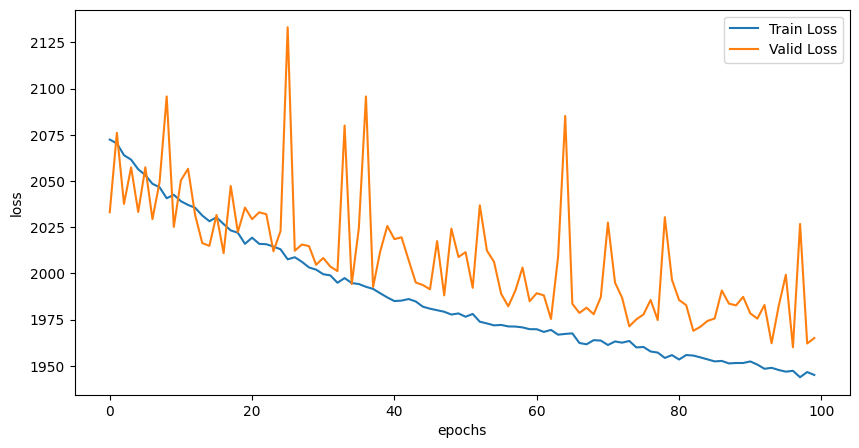

In [94]:
plt.figure(figsize=(10,5))
plt.plot([float(loss) for loss in train_loss], label='Train Loss')
plt.plot([float(loss) for loss in valid_loss], label='Valid Loss')

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [109]:
x = y = output = None
with torch.no_grad():

    data = train_loader.__iter__()._next_data()

    x = data['input_colors'].to(device)
    y = data['output_colors']
    output = model.forward(x)

In [110]:
x = x[0].cpu().detach().numpy()
y = y[0].cpu().detach().numpy()
output = output[0].cpu().detach().numpy()

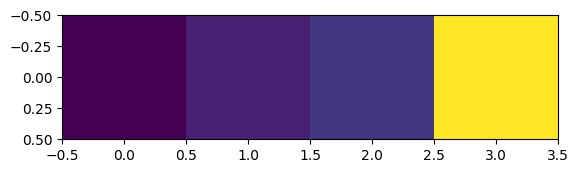

In [111]:
plt.imshow([[x[i] for i in range(4)]])

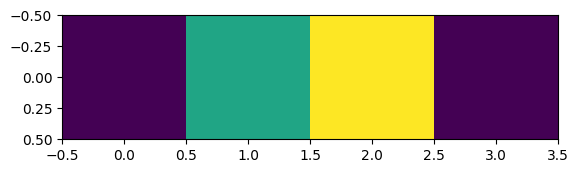

In [112]:
plt.imshow([[y[i] for i in range(4)]])

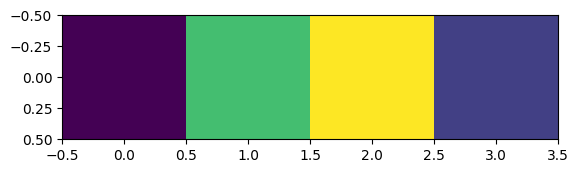

In [113]:
plt.imshow([[output[i] for i in range(4)]])